<font size=5>实现一元线性回归和多元线性回归</font><br/>实现一元线性回归

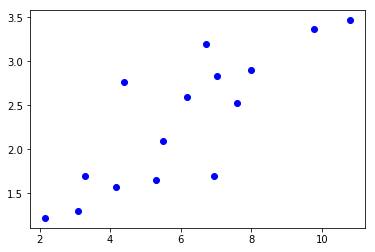

In [13]:
import torch
import numpy as np
from torch.autograd import Variable
torch.manual_seed(2018)
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 画出图像
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

In [14]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
# 转换成 Tensor　再转换为Variable
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = Variable(x_train)
y_train = Variable(y_train)

In [15]:
# 构建一元线性回归模型
# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化
def linear_model(x):
    return x * w + b



In [16]:
#构建线性回国模型
y_ = linear_model(x_train)

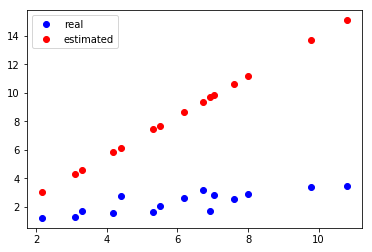

In [17]:
#没有使用梯度下降算法之前的数据分布
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [18]:
#计算此时的误差函数
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

loss = get_loss(y_, y_train)

In [19]:
print(loss)

Variable containing:
 45.3156
[torch.FloatTensor of size 1]



In [20]:
#定义好了误差函数，接下来我们需要计算 w 和 b 的梯度了
loss.backward()
# 查看 w 和 b 的梯度
print(w.grad)
print(b.grad)

Variable containing:
 87.3567
[torch.FloatTensor of size 1]

Variable containing:
 12.3206
[torch.FloatTensor of size 1]



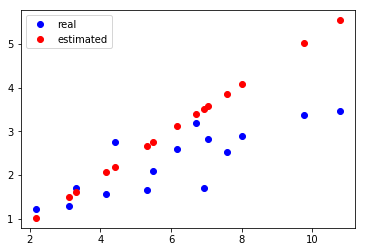

In [21]:
# 更新一次参数 学习率　o.o1
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data
#完成一次参数更新参数之后，我们再一次看看模型输出的结果
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [25]:
#进行20次参数更新
for e in range(20): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

epoch: 0, loss: 0.2580133378505707
epoch: 1, loss: 0.2575562596321106
epoch: 2, loss: 0.25710156559944153
epoch: 3, loss: 0.2566491663455963
epoch: 4, loss: 0.25619909167289734
epoch: 5, loss: 0.255751371383667
epoch: 6, loss: 0.2553059160709381
epoch: 7, loss: 0.2548627555370331
epoch: 8, loss: 0.2544218599796295
epoch: 9, loss: 0.25398319959640503
epoch: 10, loss: 0.2535468339920044
epoch: 11, loss: 0.25311270356178284
epoch: 12, loss: 0.2526807487010956
epoch: 13, loss: 0.2522510290145874
epoch: 14, loss: 0.2518235445022583
epoch: 15, loss: 0.2513982653617859
epoch: 16, loss: 0.2509751319885254
epoch: 17, loss: 0.2505542039871216
epoch: 18, loss: 0.2501353919506073
epoch: 19, loss: 0.2497187852859497


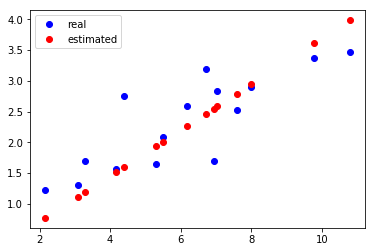

In [26]:
#查看更新后模型的预测结果
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

总结：经过20次更新，我们发现红色的预测结果已经比较好的拟合了蓝色的真实值。


<font size=5>实现多元线性回归</font><br/>

In [78]:
# 定义一个多变量函数
w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数
f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)




y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


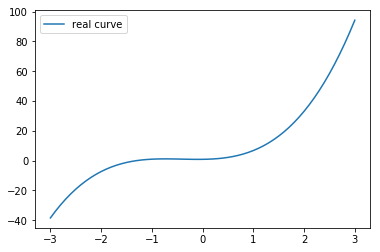

In [79]:
# 画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

In [80]:
# 构建数据 x 和 y的矩阵
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]

x_train = np.stack([x_sample ** i for i in range(1, 4)],axis=1)
#x_train = np.cat([x_sample ** i for i in range(1, 4)],1)#矩阵的拼接stack cat
#print(x_train)
#print(y_train)
x_train = torch.from_numpy(x_train).float() # 转换成 float tensor
y_train = torch.from_numpy(y_sample).float().unsqueeze(1) # 转化成 float tenso　并且y_train添加一维
#print(y_train)

In [81]:
# 定义参数和模型
w = Variable(torch.randn(3, 1), requires_grad=True)#参数w随机初始化
b = Variable(torch.zeros(1), requires_grad=True)#参数b初始化为０

# 将 x_train 和 y_train 转换成 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b#torch.mm做矩阵乘法


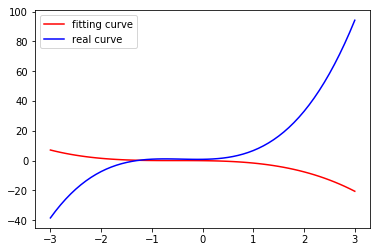

In [82]:
# 画出更新之前的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [83]:
# 计算误差，这里的误差和一元的线性模型的误差是相同的，前面已经定义过了 get_loss
loss = get_loss(y_pred, y_train)
print(loss)

Variable containing:
 1299.7908
[torch.FloatTensor of size 1]



In [84]:
# 自动求导
loss.backward()
# 查看一下 w 和 b 的梯度
print(w.grad)
print(b.grad)

Variable containing:
-104.7578
-135.0328
-689.4906
[torch.FloatTensor of size 3x1]

Variable containing:
-25.0078
[torch.FloatTensor of size 1]



In [85]:
# 更新一下参数　学习率是0.01
w.data = w.data - 0.01 * w.grad.data
b.data = b.data - 0.01 * b.grad.data

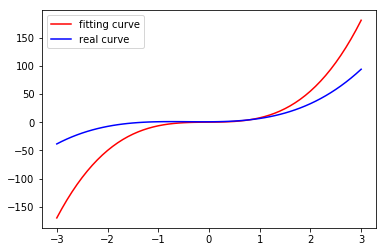

In [86]:
# 画出更新一次之后的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [87]:
# 进行 100 次参数更新 每２０－次输出一次结果
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()#每次迭代　进行梯度下降之前需要将梯度值归为０
    b.grad.data.zero_()
    loss.backward()
    
    # 更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e+1, loss.data[0]))

epoch 20, Loss: 27.55816
epoch 40, Loss: 6.49788
epoch 60, Loss: 1.59655
epoch 80, Loss: 0.44968
epoch 100, Loss: 0.17915


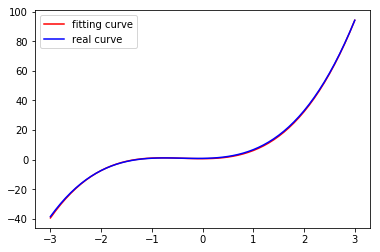

In [88]:
# 画出更新之后的结果
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [91]:
loss.data


 0.1791
[torch.FloatTensor of size 1]

<font size=6>总结：步骤</font><br/>
1.获得数据矩阵x y,　并转化为tensor,再转换为variable<br\>
2.初始化参数，将参数转化为variable,并且requires_grad=True<br\>
3.建立模型函数<br\>
4.建立损失函数<br\>
5.对损失函数求导数<br\>
6.更新参数　w.data = w.data - 0.01 * w.grad.data<br\>
7.迭代更新参数（每次迭代　进行梯度下降之前需要将梯度值归为０）w.grad.data.zero_()<br\>